<h1>Bitcoin price analysis with the MACD indicator</h1>

<h2>Fetch bitcoin historical data</h2

Daily Time Frame


In [ ]:
import matplotlib.pyplot as plt
from strategies.macd import get_macd
from datasets.btc_data import get_data
from utils.time_frame import TimeFrame


btc_data = get_data(TimeFrame.DAILY, date_from='2019-06-07', date_to='2022-03-01')
macd_data = get_macd(btc_data.copy())
print(btc_data)
print(macd_data)

<h2>Bitcoin Chart</h2

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_facecolor('white')
fig.set_facecolor('white')
plt.plot(btc_data['close'], lw=0.5, label='BTC')
plt.xlabel('Data')
plt.ylabel('Cena')
plt.title('BTC/USD')
plt.legend(loc='upper left')
plt.savefig('charts/daily/btc_chart.png')
plt.show()

<h2>MACD Chart</h2

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_facecolor('lightgray')
fig.set_facecolor('lightgray')
plt.plot(macd_data['macd'], label='MACD', color='red', lw=0.4)
plt.xlabel('Data')
plt.ylabel('MACD')
plt.title('MACD')
plt.legend(loc='upper left')
plt.show()

<h2>SIGNAL Chart</h2

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_facecolor('lightgray')
fig.set_facecolor('lightgray')
plt.plot(macd_data['signal'], label='Signal', color='green', lw=0.4)
plt.xlabel('Data')
plt.ylabel('Signal')
plt.title('Signal')
plt.legend(loc='upper left')
plt.show()

<h2>MACD + SIGNAL Chart</h2

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_facecolor('lightgray')
fig.set_facecolor('lightgray')
plt.plot(macd_data['macd'], label='MACD', color='red', lw=0.4)
plt.plot(macd_data['signal'], label='Signal', color='green', lw=0.4)

plt.xlabel('Date')
plt.ylabel('MACD')
plt.title('MACD i SIGNAL')
plt.legend(loc='upper left')
plt.show()

<h2>MACD Histogram</h2

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_facecolor('lightgray')
fig.set_facecolor('lightgray')

plt.bar(macd_data.index, macd_data['histogram'], color='orange', width=0.4)

plt.axhline(0, color='black', lw=2)
plt.xlabel('Data')
plt.ylabel('MACD Histogram')
plt.title('MACD Histogram')
# display the plot
plt.show()

<h2>FULL MACD</h2>

In [ ]:

fig, ax = plt.subplots(figsize=(20, 8))
ax.set_facecolor('white')
fig.set_facecolor('white')
plt.plot(macd_data['macd'], label='MACD', color='red', lw=0.4)
plt.plot(macd_data['signal'], label='Signal', color='green', lw=0.3)

plt.bar(macd_data.index, macd_data['histogram'], color='orange', width=0.4, label='Histogram')

plt.axhline(0, color='black', lw=2)

plt.xlabel('Data')
plt.ylabel('MACD')
plt.title('MACD, Signal oraz Histogram')
plt.legend(loc='upper left')

plt.savefig('charts/daily/full_macd.png')
# display the plot
plt.show()

<h2>BTC + MACD Chart</h2

In [ ]:

fig, ax = plt.subplots(figsize=(20, 8))
ax.set_facecolor('white')
fig.set_facecolor('white')
plt.plot(btc_data['close'], lw=0.4)
plt.plot(macd_data['macd'], label='MACD', color='red', lw=0.3)
plt.plot(macd_data['signal'], label='Signal', color='green', lw=0.3)

plt.bar(macd_data.index, macd_data['histogram'], color='orange', width=0.4, label='Histogram')

plt.axhline(0, color='black', lw=0.1)

plt.xlabel('Data')
plt.ylabel('BTC/USD + MACD')
plt.title('BTC/USD + MACD')
plt.legend(loc='upper left')
plt.savefig('charts/daily/btc_and_macd.png')
plt.show()

BTC + MACD Chart + EMAs

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_facecolor('white')
fig.set_facecolor('white')
plt.plot(btc_data['close'], lw=0.4)
plt.plot(macd_data['macd'], label='MACD', color='red', lw=0.3)
plt.plot(macd_data['signal'], label='Signal', color='green', lw=0.3)
plt.plot(macd_data['ema12'], label='EMA12', color='magenta', lw=0.3)
plt.plot(macd_data['ema26'], label='EMA26', color='cyan', lw=0.3)


plt.bar(macd_data.index, macd_data['histogram'], color='orange', width=0.4, label='Histogram')

plt.axhline(0, color='black', lw=0.1)

plt.xlabel('Data')
plt.ylabel('BTC/USD + wakzniki')
plt.title('BTC/USD + MACD + EMA12 + EMA26')
plt.legend(loc='upper left')
plt.savefig('charts/daily/btc_and_macd_and_emas.png')
plt.show()

Backtesting

In [ ]:
from backtesting.macd_backtester import MACDTester
macd_tester = MACDTester(macd_data)
total_return = macd_tester.get_total_return()
print(f'Total return: {total_return}$')


### Transactions

Transactions Info

In [ ]:
from logger.logger import TransactionLogger
transaction_logger = TransactionLogger()
transaction_logger.log_transactions_info(macd_tester.transactions)

Profit after each transaction

In [ ]:
transactions = macd_tester.transactions
start_capital = 1000
transaction_values = [transaction.price * transaction.amount - start_capital for transaction in transactions]

fig, ax = plt.subplots(figsize=(20, 8))
ax.set_facecolor('white')
fig.set_facecolor('white')

plt.plot(transaction_values, label='Value', color='green', lw=0.5)

plt.xlabel('Numer Transakcji')
plt.ylabel('Zysk')
plt.title('Zysk po każdej transakcji')
plt.legend(loc='upper left')
plt.savefig('charts/daily/profit_after_each_transaction.png')
plt.show()

Profit after each transaction against Date

In [ ]:

transaction_dates = [transaction.date for transaction in transactions]
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_facecolor('white')
fig.set_facecolor('white')

plt.plot(transaction_dates, transaction_values, label='Value', color='green', lw=0.5)

plt.xlabel('Data')
plt.ylabel('Zysk')
plt.title('Zysk po każdej transakcji')
plt.legend(loc='upper left')
plt.savefig('charts/daily/profit_after_each_transaction_date.png')
plt.show()

Profits/Losses

In [ ]:
profits = macd_tester.get_transaction_profits()
print(profits)
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_facecolor('white')
fig.set_facecolor('white')

plt.bar(profits.index, profits['Profit/Loss'], color='blue', width=0.8, label='Profit/Loss')

plt.axhline(0, color='black', lw=0.1)

plt.xlabel('Numer Transakcji')
plt.ylabel('Zysk/Strata')
plt.title('Zysk/Strata transakcji sprzedaży względem poprzedniej transakcji kupna')
plt.legend(loc='upper left')
plt.savefig('charts/daily/profit_loss_bar.png')
plt.show()

In [ ]:
buy_dates = macd_tester.get_buy_dates()
buy_prices = macd_tester.get_buy_prices()
sell_dates = macd_tester.get_sell_dates()
sell_prices = macd_tester.get_sell_prices()

fig, ax = plt.subplots(figsize=(20, 8))

# set the background color of the axes
ax.set_facecolor('white')
fig.set_facecolor('white')
plt.plot(btc_data['close'], lw=0.4)
plt.plot(macd_data['macd'], label='MACD', color='red', lw=0.3)
plt.plot(macd_data['signal'], label='Signal', color='green', lw=0.3)
plt.scatter(buy_dates, buy_prices, color='g', s=10)
plt.scatter(sell_dates, sell_prices, color='r', s=10)

plt.bar(macd_data.index, macd_data['histogram'], color='orange', width=0.4, label='Histogram')

plt.axhline(0, color='black', lw=0.1)

plt.xlabel('Data')
plt.ylabel('BTC/USD')
plt.title('BTC/USD + punkty kupna i sprzedaży')
plt.legend(loc='upper left')

plt.savefig('charts/maccd_backtesting_daily.png')
plt.show()


EMA Optimization

In [53]:
import itertools
from pandas import DataFrame
from backtesting.macd_backtest import backtest_macd

def find_optimal_ema_parameters(data: DataFrame, start_amount: float = 1000) -> tuple:
    best_params = (12, 26)
    best_return = -float('inf')

    first_ema_range = range(5, 30)
    second_ema_range = range(10, 50)

    for params in itertools.product(first_ema_range, second_ema_range):
        first_ema, second_ema = params
        if first_ema == second_ema:
            continue
        macd_data = get_macd(data, short_ema_length=first_ema, long_ema_length=second_ema)
        total_return = backtest_macd(macd_data, start_amount=start_amount)
        if total_return > best_return:
            best_return = total_return
            best_params = params

    return best_params

print(find_optimal_ema_parameters(btc_data))

(29, 48)


Optimized EMA parameters

In [54]:
macd_data = get_macd(btc_data, 23, 39, 19)
macd_tester = MACDTester(macd_data)
total_return = macd_tester.get_total_return()
print(f'Total return: {total_return}$')

Total return: 6330.411856500837$


Transactions Info

In [55]:
transaction_logger.log_transactions_info(macd_tester.transactions)

INFO:logger.logger:Number of profitable transactions: 9
        Transaction(Type: SELL,
        Date: 2021-12-30 00:00:00,
        Price: 47150.71,
        Profit: -531.6715629356995,
        Amount: 0.16152816273859094
        
INFO:logger.logger:Best transaction: 
        Transaction(Type: SELL,
        Date: 2021-01-20 00:00:00,
        Price: 35496.91,
        Profit: 1733.719009183907,
        Amount: 0.13669984389595466
        


MACD after EMA optimization

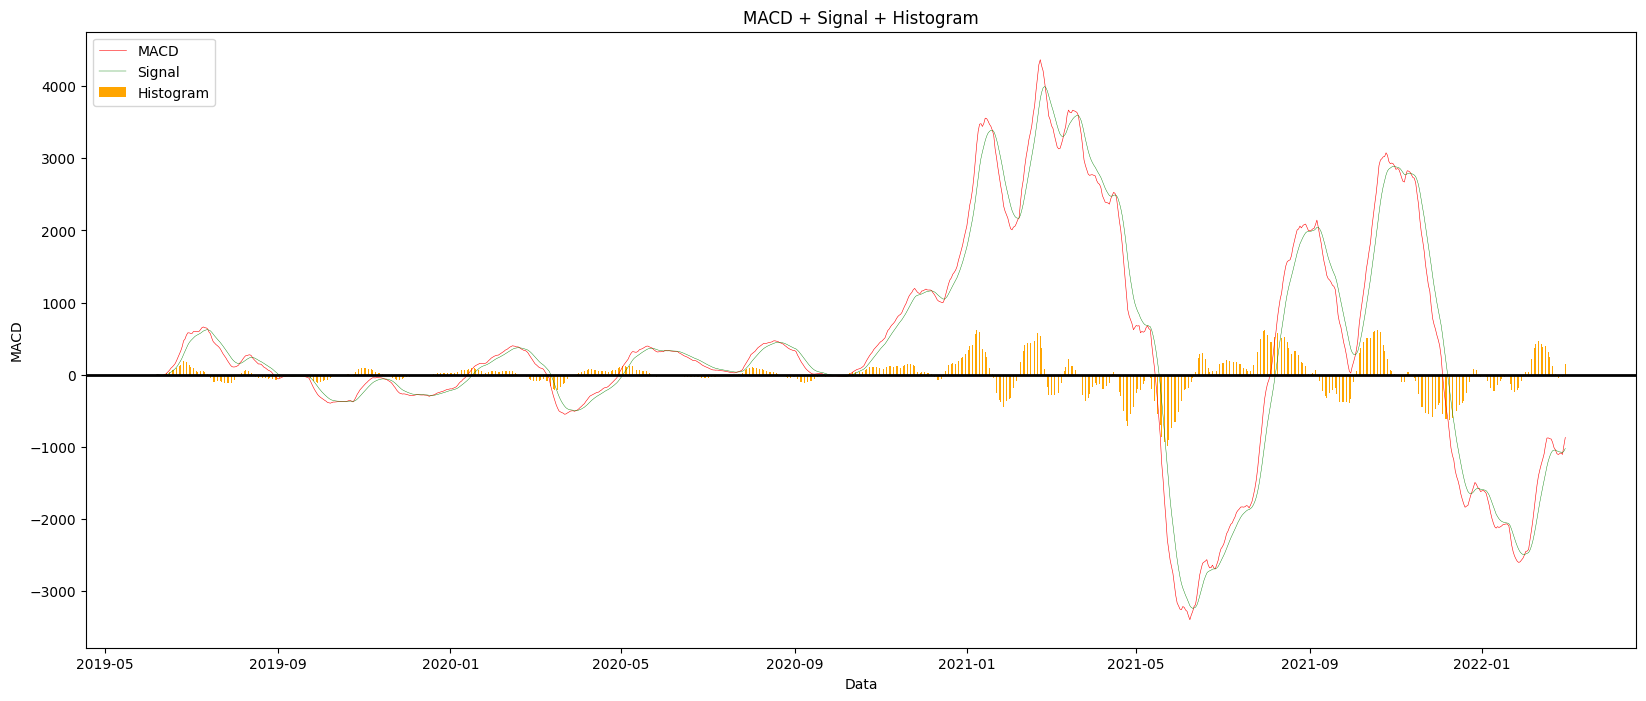

In [56]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_facecolor('white')
fig.set_facecolor('white')
plt.plot(macd_data['macd'], label='MACD', color='red', lw=0.4)
plt.plot(macd_data['signal'], label='Signal', color='green', lw=0.3)

plt.bar(macd_data.index, macd_data['histogram'], color='orange', width=0.4, label='Histogram')

plt.axhline(0, color='black', lw=2)

plt.xlabel('Data')
plt.ylabel('MACD')
plt.title('MACD + Signal + Histogram')
plt.legend(loc='upper left')

plt.savefig('charts/daily/full_macd_ema_optimized.png')
# display the plot
plt.show()

BTC + MACD Chart after EMA optimization

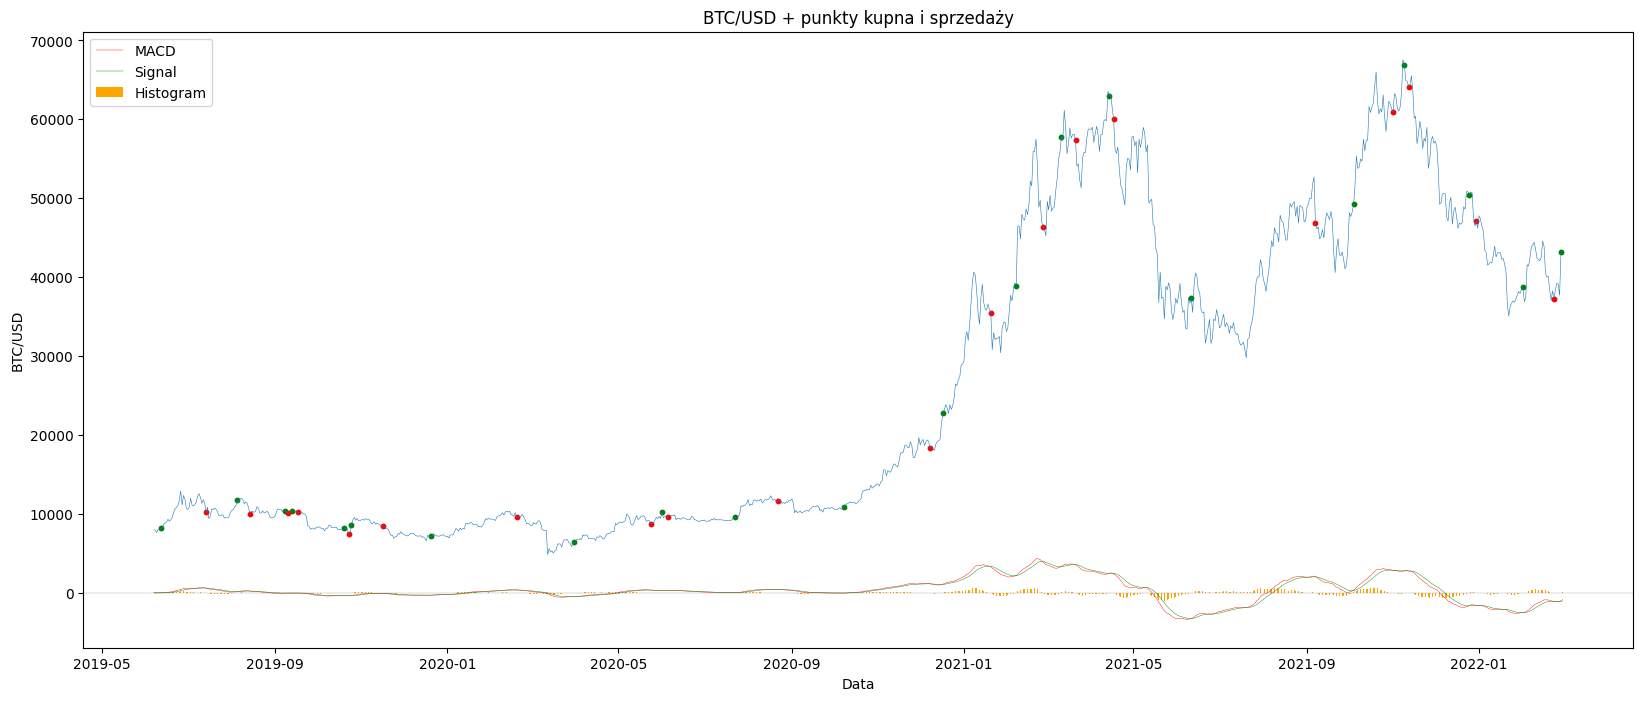

In [57]:
buy_dates = macd_tester.get_buy_dates()
buy_prices = macd_tester.get_buy_prices()
sell_dates = macd_tester.get_sell_dates()
sell_prices = macd_tester.get_sell_prices()

fig, ax = plt.subplots(figsize=(20, 8))

# set the background color of the axes
ax.set_facecolor('white')
fig.set_facecolor('white')
plt.plot(btc_data['close'], lw=0.4)
plt.plot(macd_data['macd'], label='MACD', color='red', lw=0.3)
plt.plot(macd_data['signal'], label='Signal', color='green', lw=0.3)
plt.scatter(buy_dates, buy_prices, color='g', s=10)
plt.scatter(sell_dates, sell_prices, color='r', s=10)

plt.bar(macd_data.index, macd_data['histogram'], color='orange', width=0.4, label='Histogram')

plt.axhline(0, color='black', lw=0.1)

plt.xlabel('Data')
plt.ylabel('BTC/USD')
plt.title('BTC/USD + punkty kupna i sprzedaży')
plt.legend(loc='upper left')

plt.savefig('charts/daily/btc_and_macd_ema_optimized.png')
plt.show()

Transactions after EMA optimization

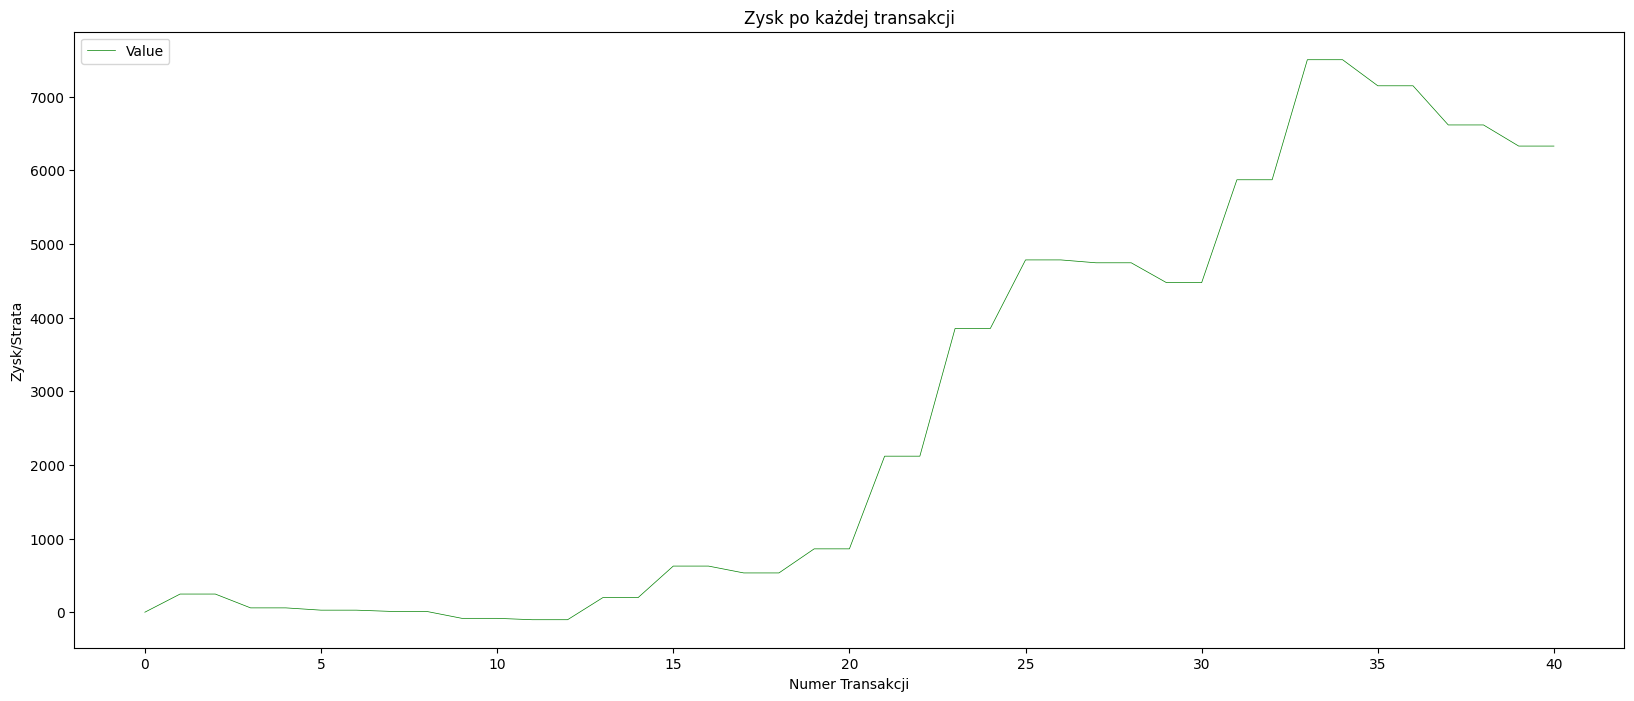

In [58]:
transactions = macd_tester.transactions
start_capital = 1000
transaction_values = [transaction.price * transaction.amount - start_capital for transaction in transactions]
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_facecolor('white')
fig.set_facecolor('white')

plt.plot(transaction_values, label='Value', color='green', lw=0.5)

plt.xlabel('Numer Transakcji')
plt.ylabel('Zysk/Strata')
plt.title('Zysk po każdej transakcji')
plt.legend(loc='upper left')
plt.savefig('charts/daily/profit_after_each_transaction_ema_optimized.png')
plt.show()

Profit/Loss after EMA optimization

    Profit/Loss
0      0.000000
1    246.518278
2      0.000000
3   -187.718258
4      0.000000
5    -30.967328
6      0.000000
7    -17.141366
8      0.000000
9    -93.877240
10     0.000000
11   -18.841835
12     0.000000
13   299.770108
14     0.000000
15   428.579469
16     0.000000
17   -93.025894
18     0.000000
19   326.916702
20     0.000000
21  1258.490411
22     0.000000
23  1733.719009
24     0.000000
25   931.119223
26     0.000000
27   -39.072780
28     0.000000
29  -269.392989
30     0.000000
31  1396.690713
32     0.000000
33  1630.049150
34     0.000000
35  -353.976251
36     0.000000
37  -531.671563
38     0.000000
39  -286.859028
40     0.000000


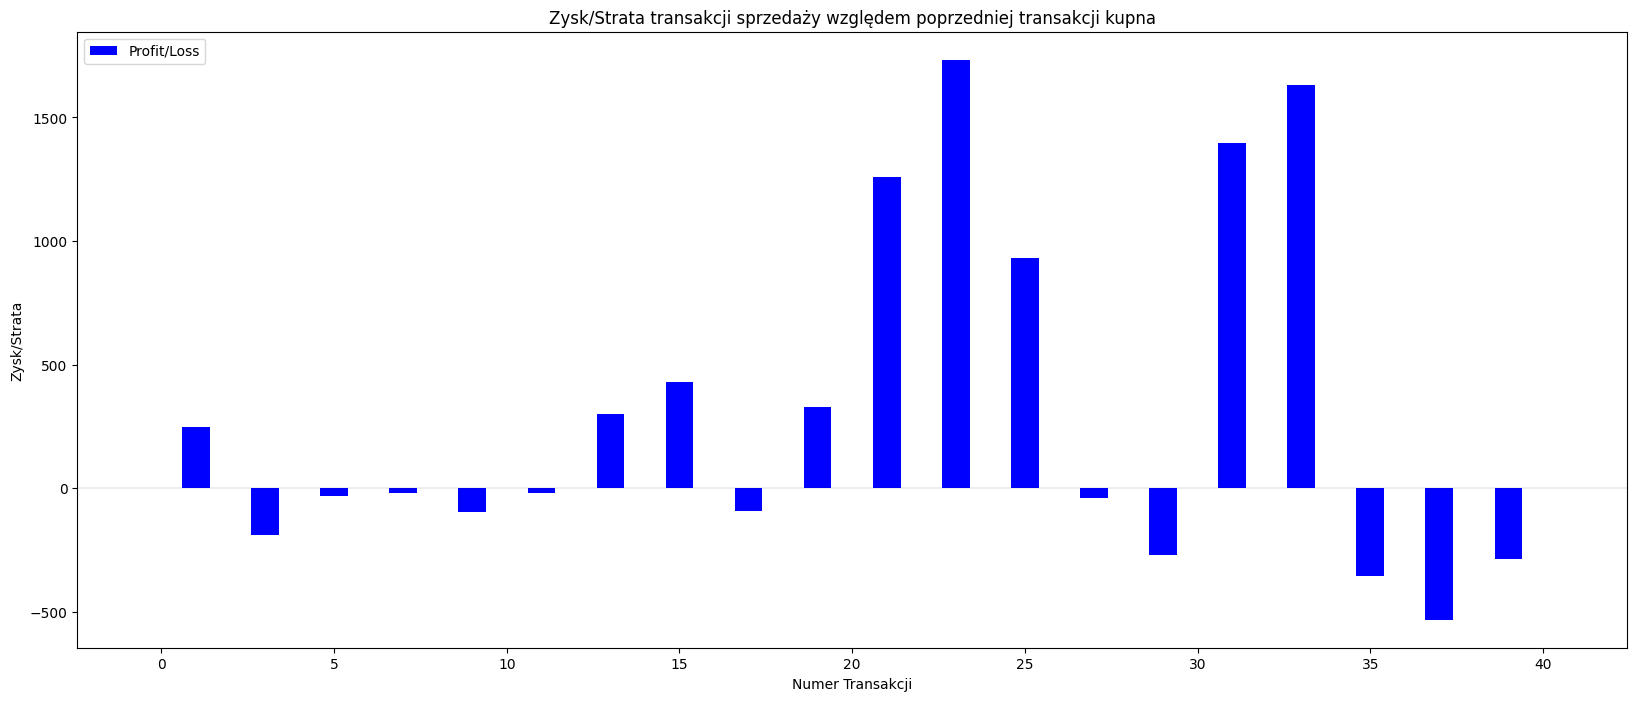

In [59]:
profits = macd_tester.get_transaction_profits()
print(profits)
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_facecolor('white')
fig.set_facecolor('white')

plt.bar(profits.index, profits['Profit/Loss'], color='blue', width=0.8, label='Profit/Loss')

plt.axhline(0, color='black', lw=0.1)

plt.xlabel('Numer Transakcji')
plt.ylabel('Zysk/Strata')
plt.title('Zysk/Strata transakcji sprzedaży względem poprzedniej transakcji kupna')
plt.legend(loc='upper left')
plt.savefig('charts/daily/profit_loss_bar_ema_optimized.png')
plt.show()

Stop Loss

In [60]:
from optimization.stop_loss_optimization import get_optimized_stop_loss
from backtesting.macd_backtester import MACDTester
from datasets.btc_data import get_data
from strategies.macd import get_macd
from utils.time_frame import TimeFrame

data = get_data(TimeFrame.DAILY, date_from='2019-06-07', date_to='2022-03-01')
macd_data = get_macd(data, 29, 48)
stop_loss = get_optimized_stop_loss(macd_data)
print(stop_loss)
macd_tester = MACDTester(macd_data, stop_loss=stop_loss)
print(macd_tester.get_total_return())

0.19
6587.020495253322


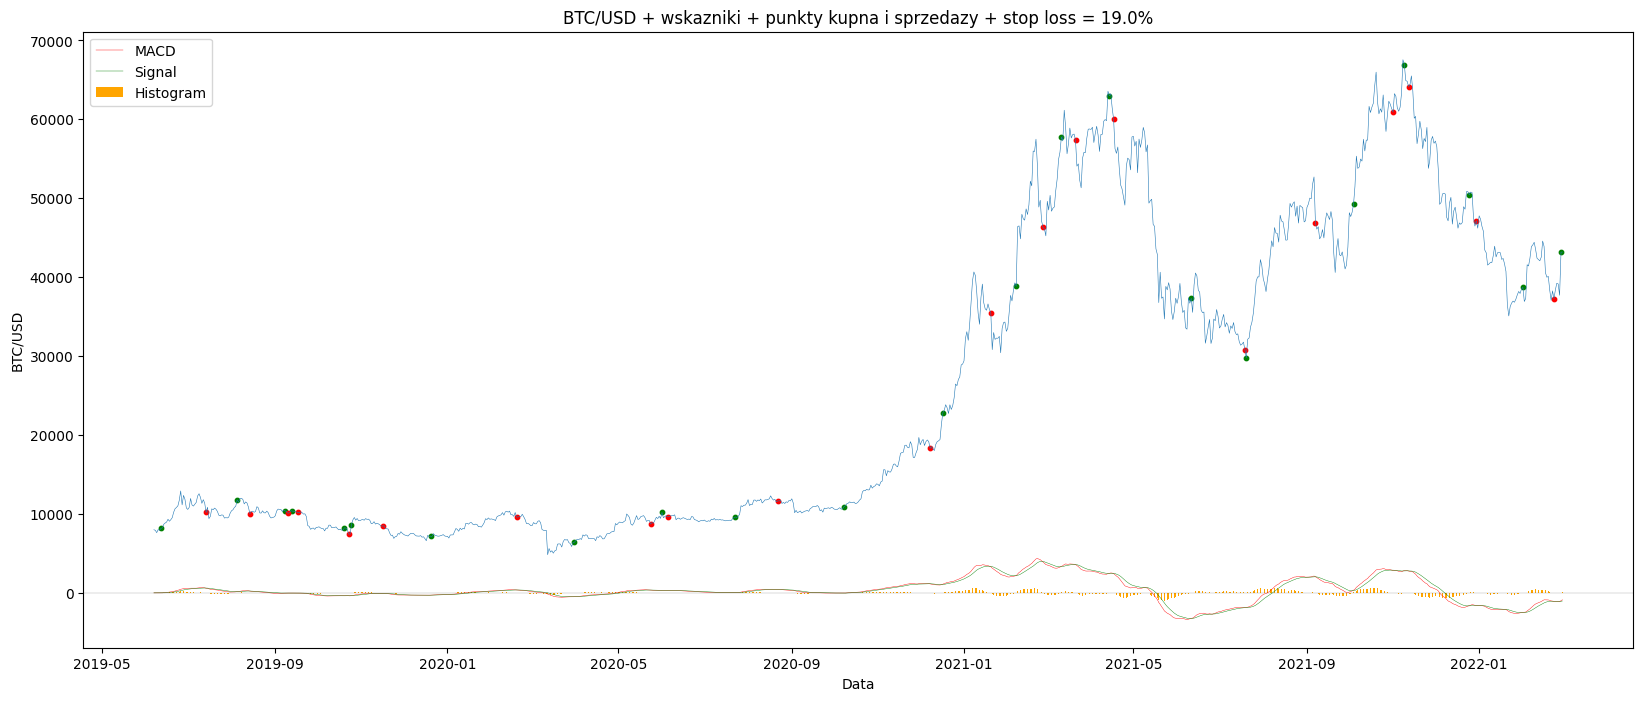

In [61]:
buy_dates = macd_tester.get_buy_dates()
buy_prices = macd_tester.get_buy_prices()
sell_dates = macd_tester.get_sell_dates()
sell_prices = macd_tester.get_sell_prices()

fig, ax = plt.subplots(figsize=(20, 8))

# set the background color of the axes
ax.set_facecolor('white')
fig.set_facecolor('white')
plt.plot(btc_data['close'], lw=0.4)
plt.plot(macd_data['macd'], label='MACD', color='red', lw=0.3)
plt.plot(macd_data['signal'], label='Signal', color='green', lw=0.3)
plt.scatter(buy_dates, buy_prices, color='g', s=10)
plt.scatter(sell_dates, sell_prices, color='r', s=10)

plt.bar(macd_data.index, macd_data['histogram'], color='orange', width=0.4, label='Histogram')

plt.axhline(0, color='black', lw=0.1)

plt.xlabel('Data')
plt.ylabel('BTC/USD')
plt.title(f'BTC/USD + wskazniki + punkty kupna i sprzedazy + stop loss = {stop_loss * 100}%')
plt.legend(loc='upper left')

plt.savefig('charts/macd_optimized_with_stop_loss.png')
plt.show()

Transactions after adding Stop Loss

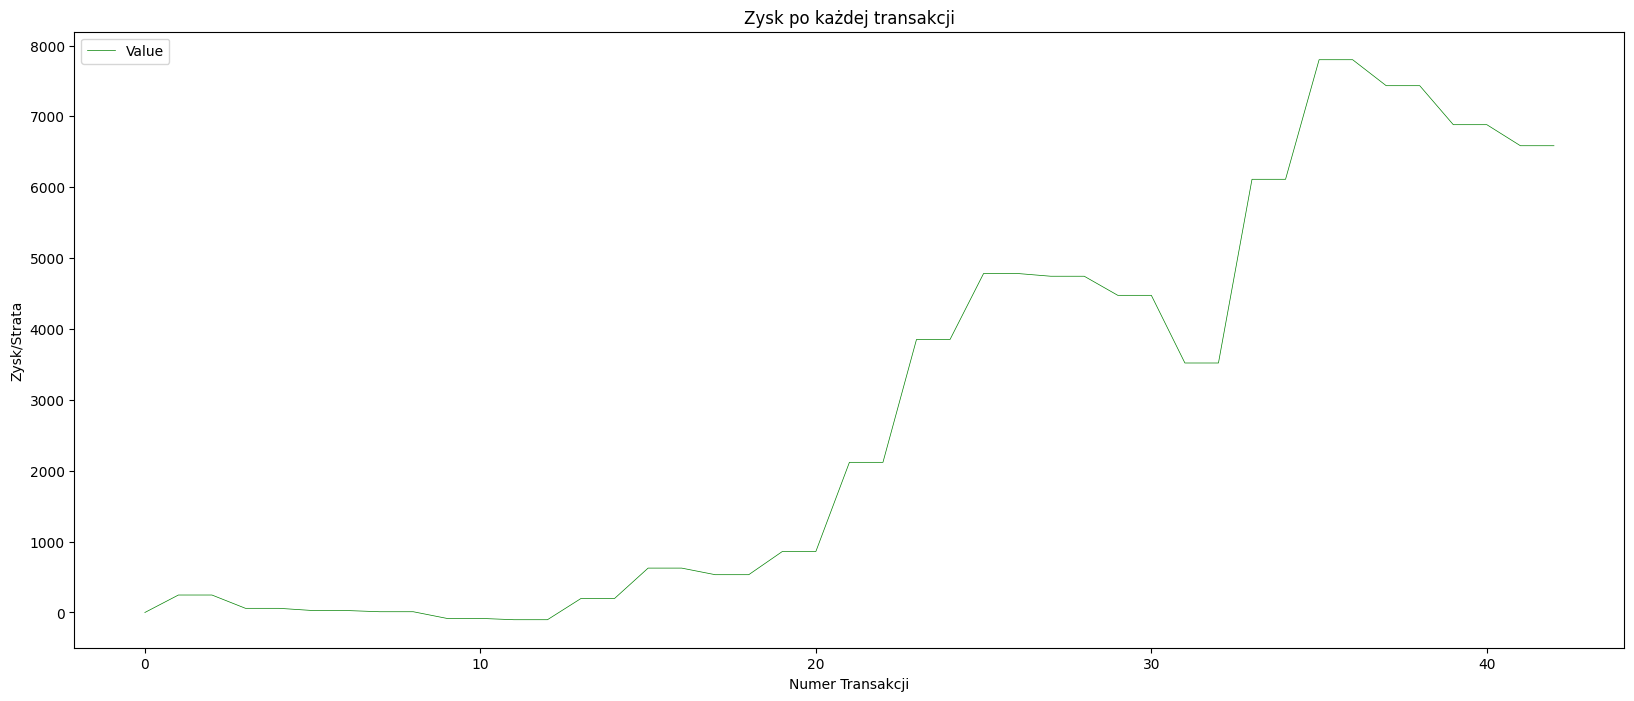

In [62]:
transactions = macd_tester.transactions
start_capital = 1000
transaction_values = [transaction.price * transaction.amount - start_capital for transaction in transactions]
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_facecolor('white')
fig.set_facecolor('white')

plt.plot(transaction_values, label='Value', color='green', lw=0.5)

plt.xlabel('Numer Transakcji')
plt.ylabel('Zysk/Strata')
plt.title('Zysk po każdej transakcji')
plt.legend(loc='upper left')
plt.savefig('charts/daily/profit_after_each_transaction_with_stop_loss.png')
plt.show()

Profit/Loss with Stop Loss

     Profit/Loss
0   0.000000e+00
1   2.465183e+02
2   0.000000e+00
3  -1.877183e+02
4   0.000000e+00
5  -3.096733e+01
6   0.000000e+00
7  -1.714137e+01
8   0.000000e+00
9  -9.387724e+01
10  0.000000e+00
11 -1.884184e+01
12  0.000000e+00
13  2.997701e+02
14  0.000000e+00
15  4.285795e+02
16  0.000000e+00
17 -9.302589e+01
18  0.000000e+00
19  3.269167e+02
20  0.000000e+00
21  1.258490e+03
22  0.000000e+00
23  1.733719e+03
24  0.000000e+00
25  9.311192e+02
26  0.000000e+00
27 -3.907278e+01
28  0.000000e+00
29 -2.693930e+02
30  0.000000e+00
31 -9.547843e+02
32  0.000000e+00
33  2.592028e+03
34 -9.094947e-13
35  1.687111e+03
36  0.000000e+00
37 -3.663676e+02
38  0.000000e+00
39 -5.502833e+02
40  0.000000e+00
41 -2.969008e+02
42  9.094947e-13


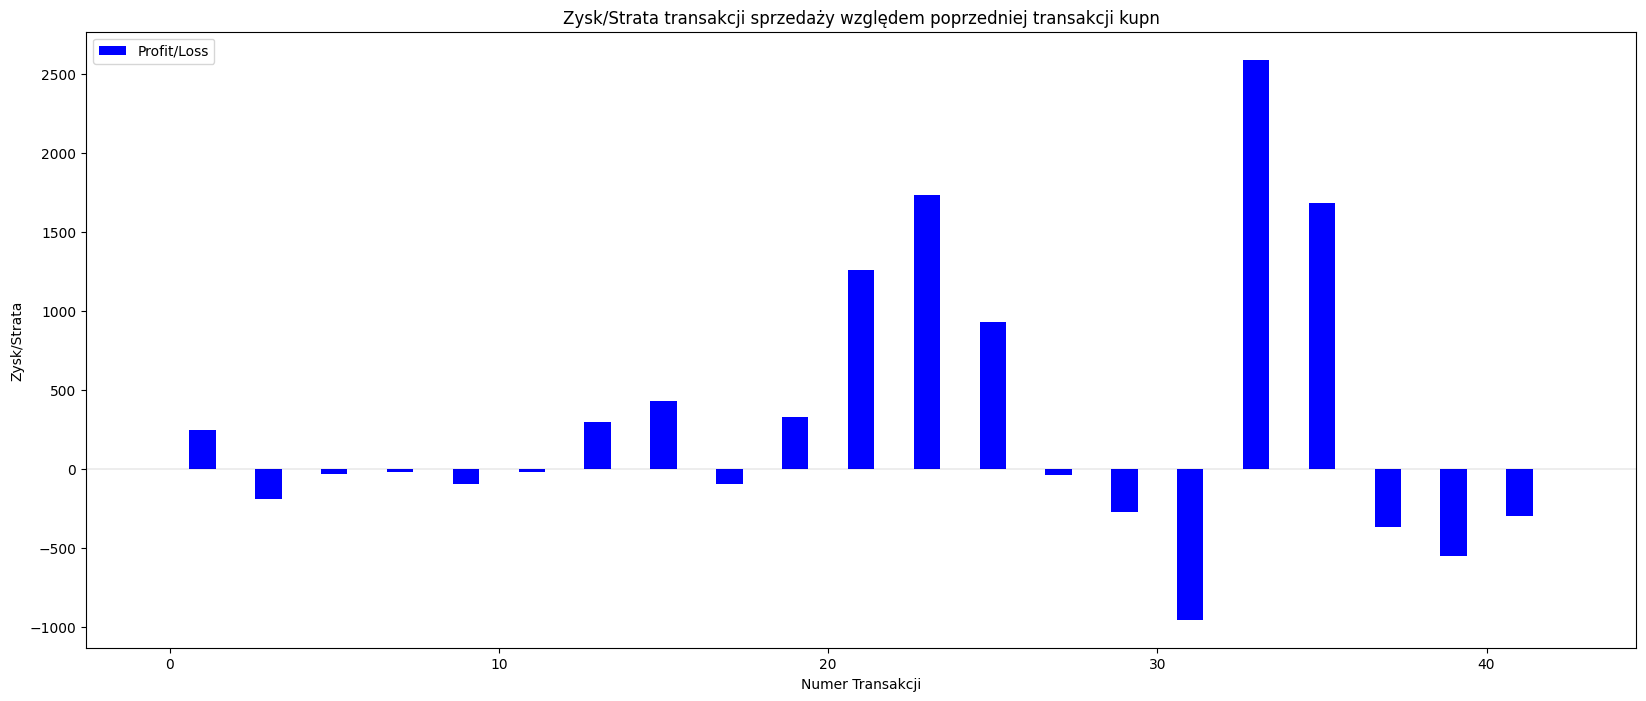

In [63]:
profits = macd_tester.get_transaction_profits()
print(profits)
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_facecolor('white')
fig.set_facecolor('white')

plt.bar(profits.index, profits['Profit/Loss'], color='blue', width=0.8, label='Profit/Loss')

plt.axhline(0, color='black', lw=0.1)

plt.xlabel('Numer Transakcji')
plt.ylabel('Zysk/Strata')
plt.title('Zysk/Strata transakcji sprzedaży względem poprzedniej transakcji kupn')
plt.legend(loc='upper left')
plt.savefig('charts/daily/profit_loss_bar_with_stop_loss.png')
plt.show()

Transactions Info

In [64]:
transaction_logger.log_transactions_info(macd_tester.transactions)

INFO:logger.logger:Number of profitable transactions: 10
        Transaction(Type: SELL,
        Date: 2021-07-19 00:00:00,
        Price: 30829.29,
        Profit: -954.7843170104088,
        Amount: 0.14662326615453264
        
INFO:logger.logger:Best transaction: 
        Transaction(Type: SELL,
        Date: 2021-09-07 00:00:00,
        Price: 46866.82,
        Profit: 2592.0283042483543,
        Amount: 0.15175596503610925
        


<h2>BTC/USD HOURLY TIME FRAME</h2>

In [65]:
from backtesting.macd_backtester import MACDTester
from datasets.btc_data import get_data
from strategies.macd import get_macd
from utils.time_frame import TimeFrame

data = get_data(TimeFrame.HOURLY, date_from='2019-06-07', date_to='2022-03-01')
print(data)
macd_data = get_macd(data)
macd_tester = MACDTester(macd_data)
print(f'Total return: {macd_tester.get_total_return()}$')

                           unix   symbol      open      high       low  \
date                                                                     
2019-06-07 00:00:00  1559865600  BTC/USD   7806.07   7836.81   7780.00   
2019-06-07 01:00:00  1559869200  BTC/USD   7789.06   7811.93   7768.89   
2019-06-07 02:00:00  1559872800  BTC/USD   7799.43   7810.65   7758.93   
2019-06-07 03:00:00  1559876400  BTC/USD   7774.96   7822.56   7767.84   
2019-06-07 04:00:00  1559880000  BTC/USD   7807.88   7826.26   7777.02   
...                         ...      ...       ...       ...       ...   
2022-02-28 20:00:00  1646078400  BTC/USD  41361.99  41971.00  41284.11   
2022-02-28 21:00:00  1646082000  BTC/USD  41917.09  41917.09  41542.60   
2022-02-28 22:00:00  1646085600  BTC/USD  41657.23  44256.08  41650.29   
2022-02-28 23:00:00  1646089200  BTC/USD  43085.30  43364.81  42892.37   
2022-03-01 00:00:00  1646092800  BTC/USD  43221.71  43626.49  43185.48   

                        close    Volu

Using optimized 24, 45 EMAs and stop loss
Stop loss: 0.06
Total return: 5038.589870242485$


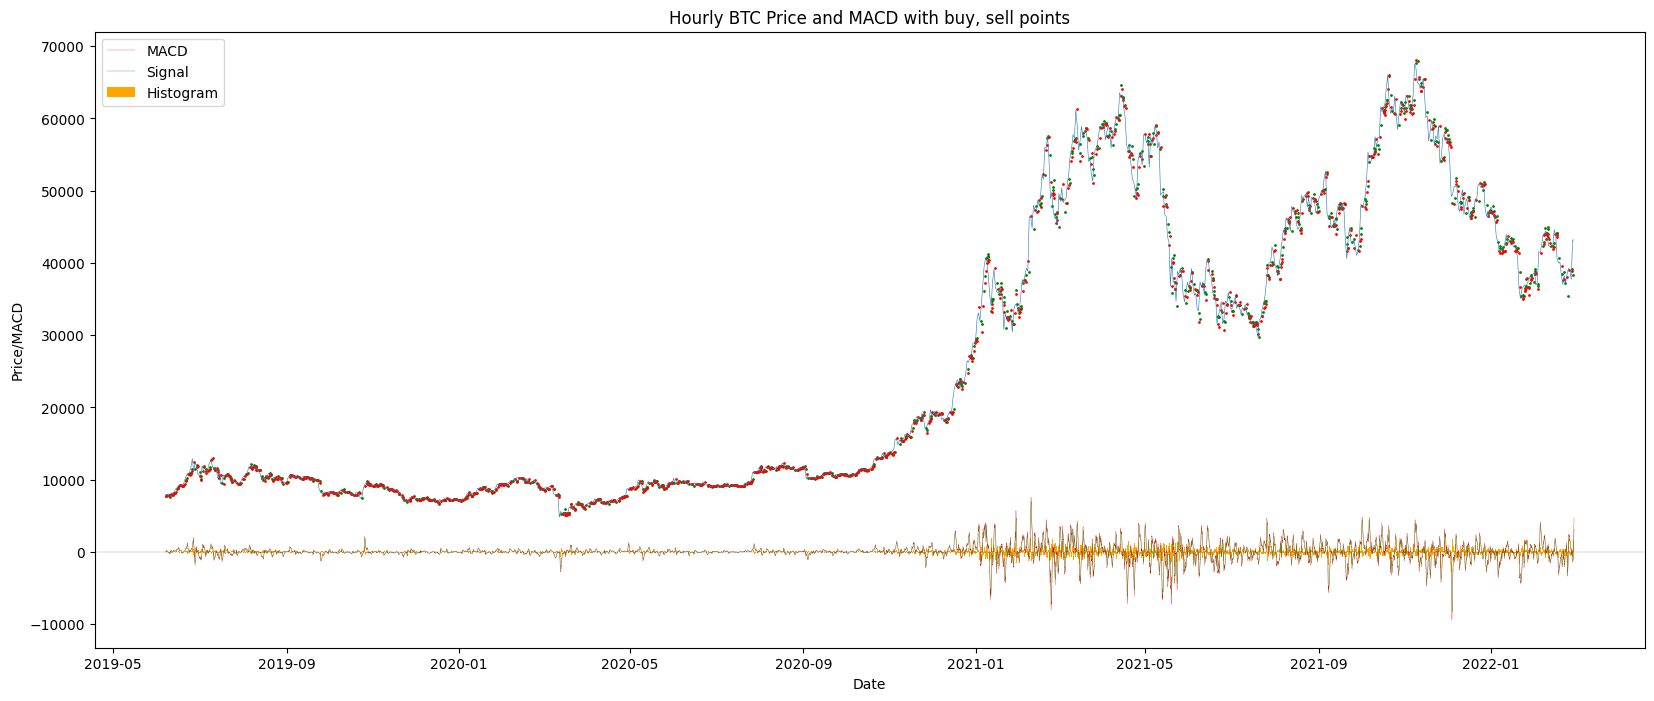

In [66]:
from optimization.stop_loss_optimization import get_optimized_stop_loss
macd_data = get_macd(data)
stop_loss = get_optimized_stop_loss(macd_data)
macd_tester = MACDTester(macd_data, stop_loss=stop_loss)
print('Using optimized 24, 45 EMAs and stop loss')
print(f'Stop loss: {stop_loss}')
print(f'Total return: {macd_tester.get_total_return()}$')
buy_dates = macd_tester.get_buy_dates()
buy_prices = macd_tester.get_buy_prices()
sell_dates = macd_tester.get_sell_dates()
sell_prices = macd_tester.get_sell_prices()

fig, ax = plt.subplots(figsize=(20, 8))

# set the background color of the axes
ax.set_facecolor('white')
fig.set_facecolor('white')
macd_data['macd'] = macd_data['macd'].apply(lambda x: x*4)
macd_data['signal'] = macd_data['signal'].apply(lambda x: x*4)
macd_data['histogram'] = macd_data['histogram'].apply(lambda x: x*4)
plt.plot(btc_data['close'], lw=0.4)
plt.plot(macd_data['macd'], label='MACD', color='red', lw=0.2)
plt.plot(macd_data['signal'], label='Signal', color='green', lw=0.2)
plt.bar(macd_data.index, macd_data['histogram'], color='orange', width=0.4, label='Histogram')
plt.scatter(buy_dates, buy_prices, color='g', s=1)
plt.scatter(sell_dates, sell_prices, color='r', s=1)

plt.axhline(0, color='black', lw=0.1)

plt.xlabel('Date')
plt.ylabel('Price/MACD')
plt.title('Hourly BTC Price and MACD with buy, sell points')
plt.legend(loc='upper left')

plt.savefig('charts/btc_and_macd_hourly.png')
plt.show()

Finding best EMAs

In [67]:
#print(find_optimal_macd_parameters(data)) -> (24, 45)

Using optimized 24, 45 EMAs and stop loss
Stop loss: 0.05
Total return: 6155.201118018546$


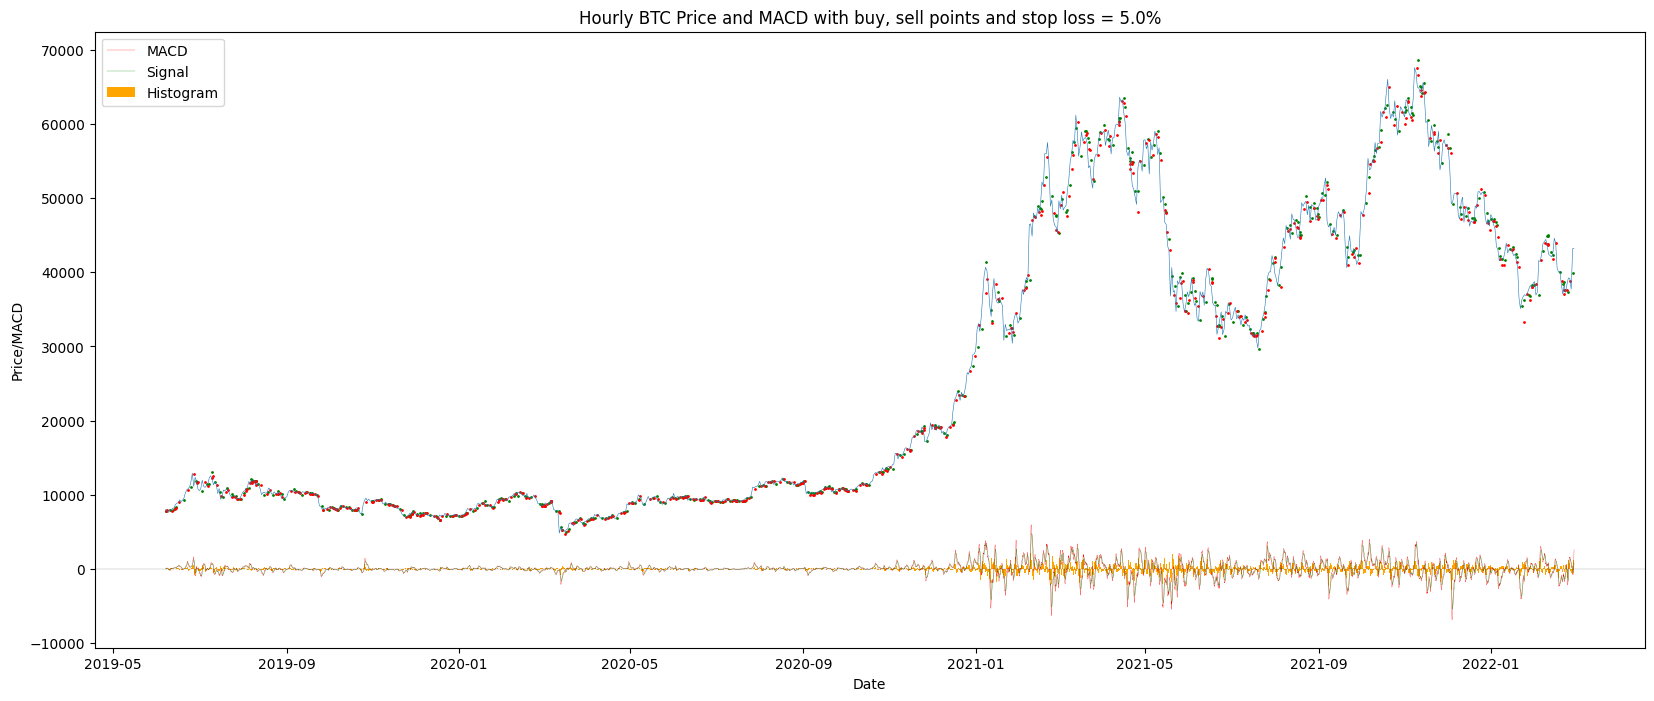

In [68]:
from optimization.stop_loss_optimization import get_optimized_stop_loss
macd_data = get_macd(data, 23, 45)
stop_loss = get_optimized_stop_loss(macd_data)
macd_tester = MACDTester(macd_data, stop_loss=stop_loss)
print('Using optimized 24, 45 EMAs and stop loss')
print(f'Stop loss: {stop_loss}')
print(f'Total return: {macd_tester.get_total_return()}$')
buy_dates = macd_tester.get_buy_dates()
buy_prices = macd_tester.get_buy_prices()
sell_dates = macd_tester.get_sell_dates()
sell_prices = macd_tester.get_sell_prices()

fig, ax = plt.subplots(figsize=(20, 8))
macd_data['macd'] = macd_data['macd'].apply(lambda x: x*4)
macd_data['signal'] = macd_data['signal'].apply(lambda x: x*4)
macd_data['histogram'] = macd_data['histogram'].apply(lambda x: x*4)

ax.set_facecolor('white')
fig.set_facecolor('white')
plt.plot(btc_data['close'], lw=0.4)
plt.plot(macd_data['macd'], label='MACD', color='red', lw=0.2)
plt.plot(macd_data['signal'], label='Signal', color='green', lw=0.2)
plt.bar(macd_data.index, macd_data['histogram'], color='orange', width=0.4, label='Histogram')
plt.scatter(buy_dates, buy_prices, color='g', s=1)
plt.scatter(sell_dates, sell_prices, color='r', s=1)

plt.axhline(0, color='black', lw=0.1)

plt.xlabel('Date')
plt.ylabel('Price/MACD')
plt.title(f'Hourly BTC Price and MACD with buy, sell points and stop loss = {stop_loss * 100}%')
plt.legend(loc='upper left')

plt.savefig('charts/hourly_macd_optimized_with_stop_loss.png')
plt.show()

Including Commission 0.0750% for HOURLY TIME FRAME

Finding best stop loss including commssion

In [ ]:
from optimization.stop_loss_optimization import get_optimized_stop_loss
from strategies.macd import get_macd
from datasets.btc_data import get_data
from utils.time_frame import TimeFrame

data = get_data(TimeFrame.HOURLY, date_from='2019-06-07', date_to='2022-03-01')
macd_data = get_macd(data)
stop_loss = get_optimized_stop_loss(macd_data, commission=0.00075)
print(stop_loss)

In [ ]:
from backtesting.macd_backtester import MACDTester
from datasets.btc_data import get_data
from strategies.macd import get_macd
from utils.time_frame import TimeFrame

data = get_data(TimeFrame.HOURLY, date_from='2019-06-07', date_to='2022-03-01')
print(data)
macd_data = get_macd(data)
macd_tester = MACDTester(macd_data, commission=0.00075)
print(f'Total return: {macd_tester.get_total_return()}$')
print(f'Number of transactions: {macd_tester.num_of_transactions}')
print(f'Total commission: {macd_tester.total_commission}$')

Including Commission 0.0750% for DAILY TIME FRAME

Finding best possible stop loss with commission

In [ ]:
from optimization.stop_loss_optimization import get_optimized_stop_loss
from strategies.macd import get_macd
from datasets.btc_data import get_data
from utils.time_frame import TimeFrame

data = get_data(TimeFrame.DAILY, date_from='2019-06-07', date_to='2022-03-01')
macd_data = get_macd(data)
stop_loss = get_optimized_stop_loss(macd_data, commission=0.00075)
print(stop_loss)

In [ ]:
from backtesting.macd_backtester import MACDTester
from datasets.btc_data import get_data
from strategies.macd import get_macd
from utils.time_frame import TimeFrame

data = get_data(TimeFrame.DAILY, date_from='2019-06-07', date_to='2022-03-01')
print(data)
macd_data = get_macd(data)
macd_tester = MACDTester(macd_data, commission=0.00075)
print(f'Total return: {macd_tester.get_total_return()}$')
print(f'Number of transactions: {macd_tester.num_of_transactions}')
print(f'Total commission: {macd_tester.total_commission}$')

BUY AND HOLD STRATEGY

In [ ]:
data = get_data(TimeFrame.HOURLY, date_from='2019-06-07', date_to='2022-03-01')
print('Hourly Time Frame')
capital = 1000
start_amount = capital / data.iloc[0]['close']
print(start_amount)
end_capital = start_amount * data.iloc[-1]['close']
print(end_capital)
print(f'Total return: {end_capital - capital}$')

In [ ]:
data = get_data(TimeFrame.DAILY, date_from='2019-06-07', date_to='2022-03-01')
print('Daily Time Frame')
capital = 1000
start_amount = capital / data.iloc[0]['close']
print(start_amount)
end_capital = start_amount * data.iloc[-1]['close']
print(end_capital)
print(f'Total return: {end_capital - capital}$')